# K-Nearest Neighbors (KNN) Tutorial

Welcome to this hands-on tutorial on K-Nearest Neighbors! KNN is one of the simplest and most intuitive machine learning algorithms.

## What is KNN?

KNN is a supervised learning algorithm that can be used for both classification and regression. It works by:
1. Finding the K nearest data points to a new sample
2. For classification: taking a majority vote from those neighbors
3. For regression: averaging the values of those neighbors

Let's dive in with practical examples!

## 1. Setup and Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification, make_regression, load_iris

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
%matplotlib inline

## 2. Simple 2D Classification Example

Let's start with a simple 2D example to visualize how KNN works.

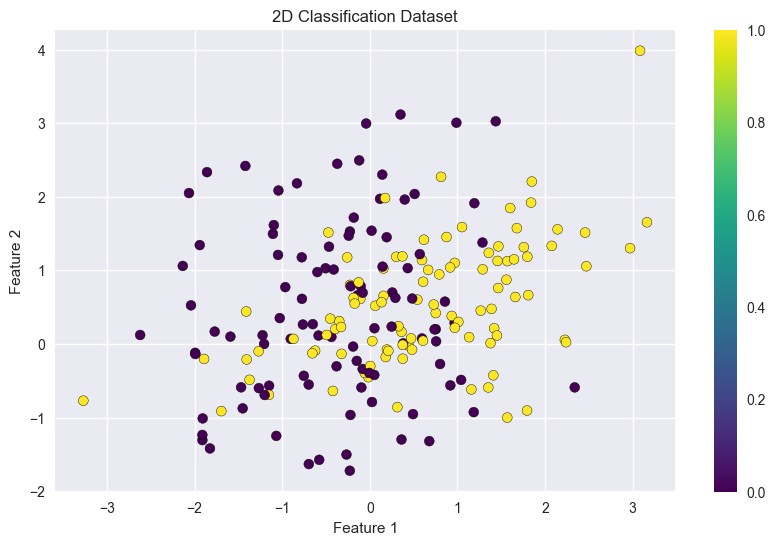

In [8]:
# Generate a simple 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                          n_redundant=0, n_clusters_per_class=1, 
                          class_sep=0.5, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='black', s=50)
plt.colorbar(scatter)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Classification Dataset')
plt.show()

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier with different K values
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}: Accuracy = {acc:.3f}")

K=1: Accuracy = 0.567
K=3: Accuracy = 0.717
K=5: Accuracy = 0.633
K=7: Accuracy = 0.617
K=9: Accuracy = 0.650


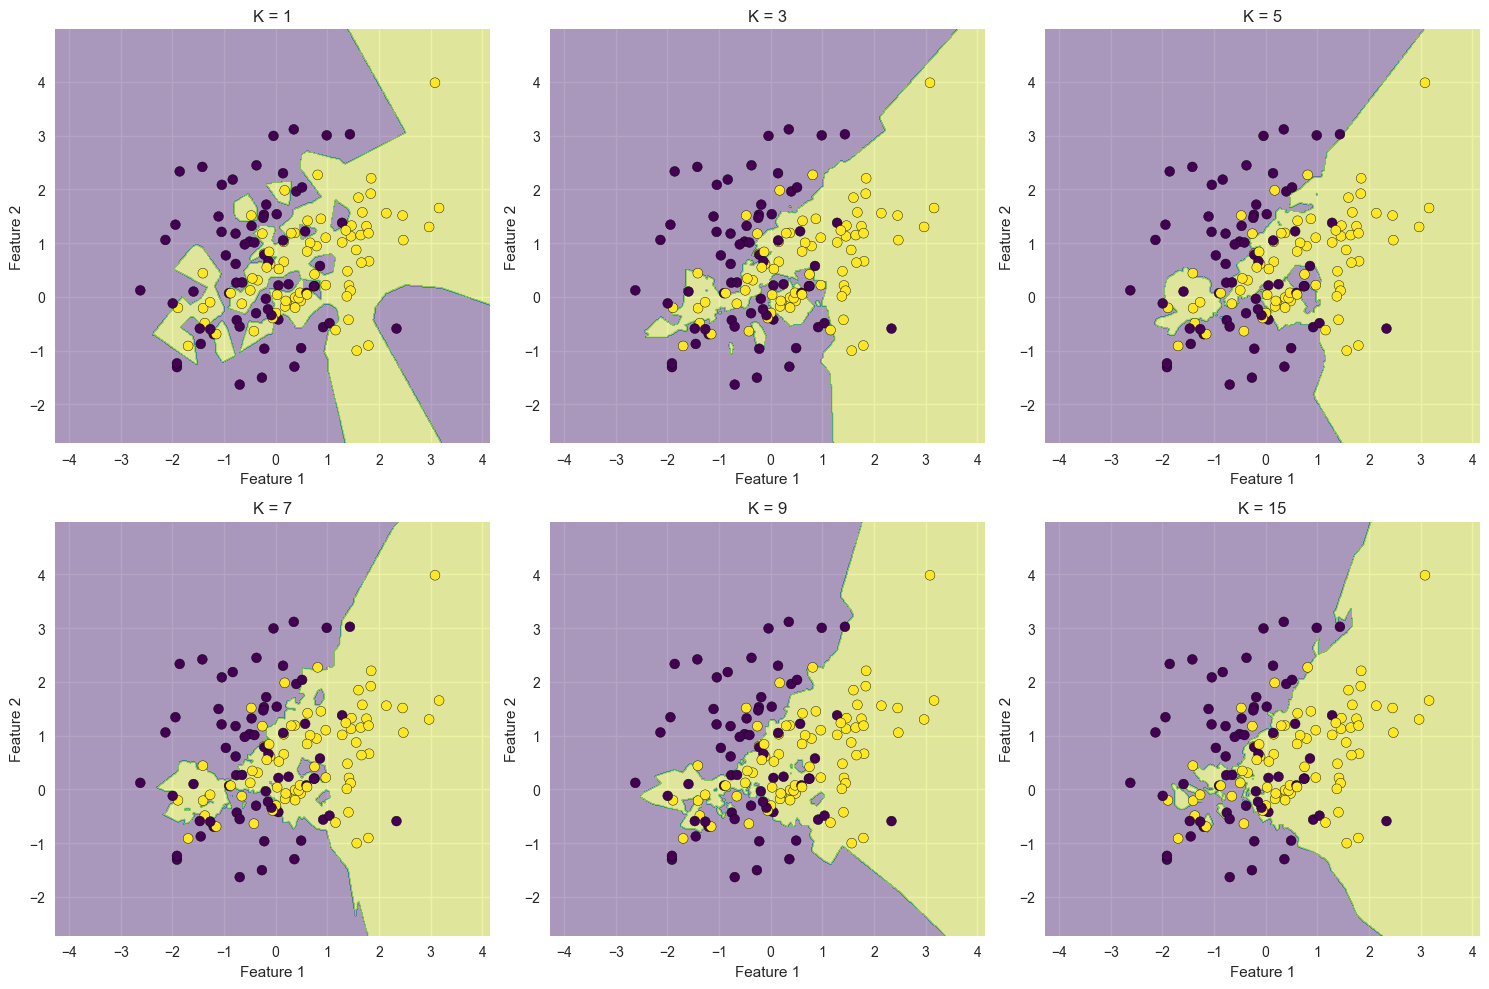

In [10]:
# Visualize decision boundaries for different K values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, k in enumerate([1, 3, 5, 7, 9, 15]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    axes[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                     cmap='viridis', edgecolor='black', s=50)
    axes[idx].set_title(f'K = {k}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 3. Working with the Iris Dataset

Let's use the famous Iris dataset for a more realistic example.

In [11]:
# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier exploration
iris_df = pd.DataFrame(X_iris, columns=feature_names)
iris_df['species'] = y_iris
iris_df['species_name'] = iris_df['species'].map({i: name for i, name in enumerate(target_names)})

print("Dataset shape:", X_iris.shape)
print("\nFirst 5 rows:")
print(iris_df.head())
print("\nClass distribution:")
print(iris_df['species_name'].value_counts())

Dataset shape: (150, 4)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

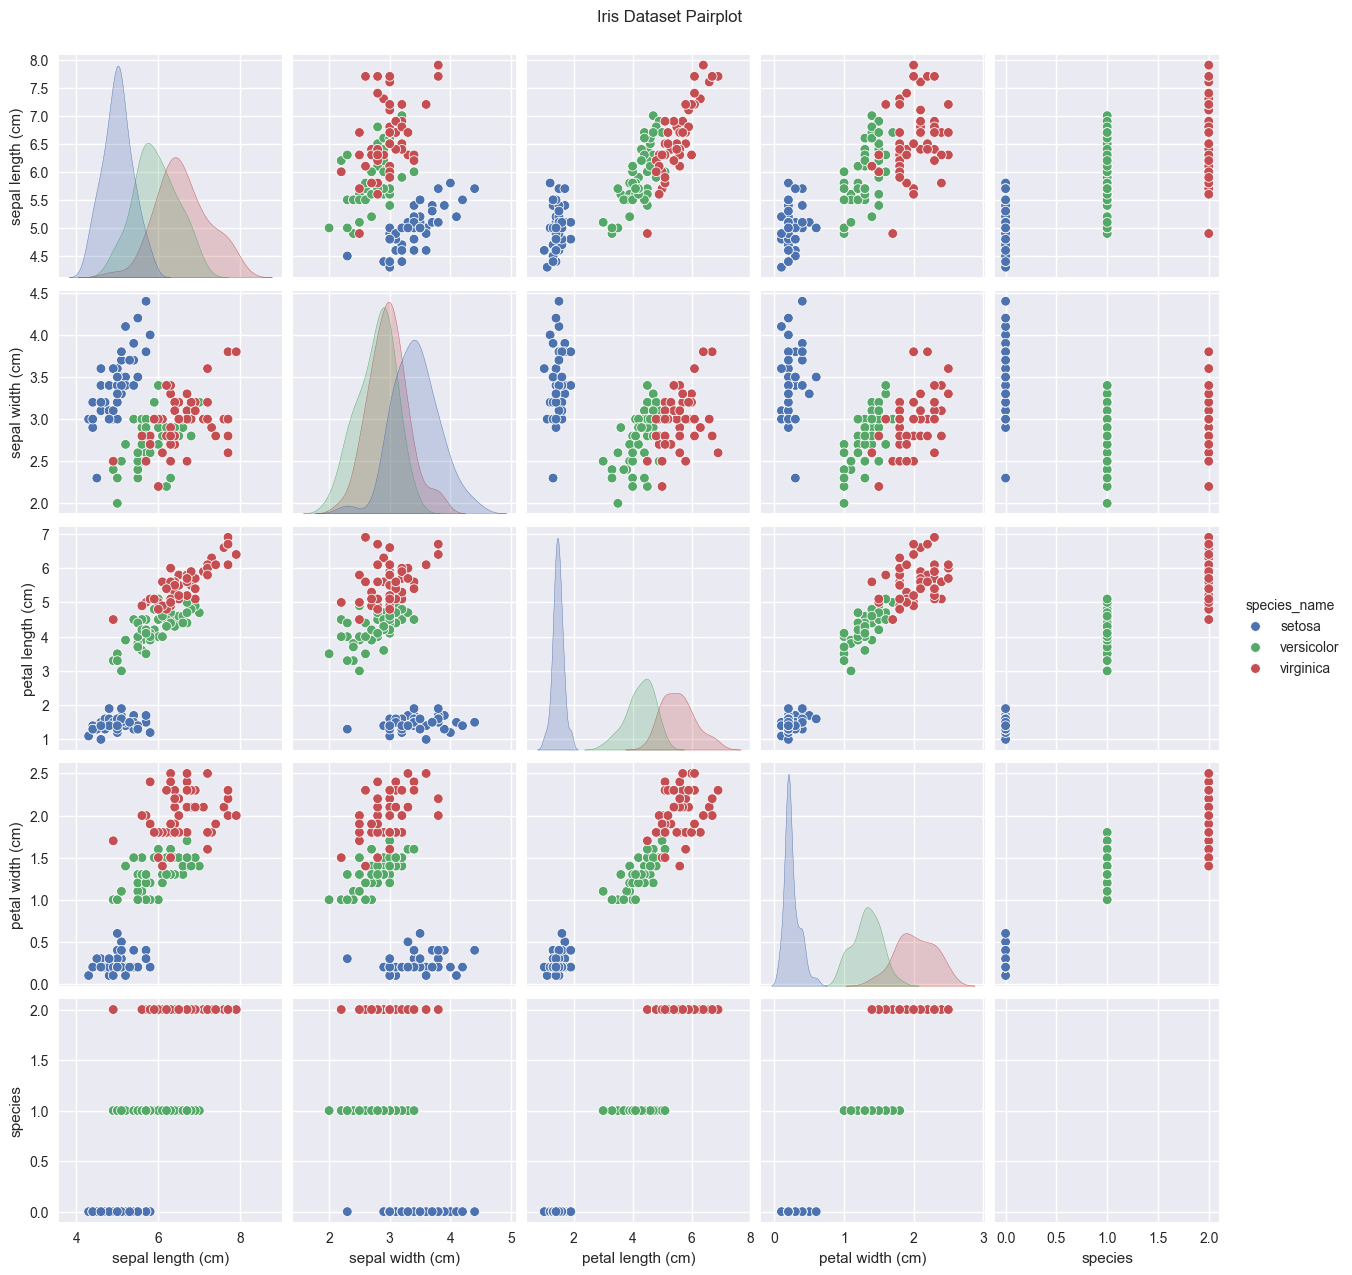

In [12]:
# Visualize the data using pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(iris_df, hue='species_name', diag_kind='kde')
plt.suptitle('Iris Dataset Pairplot', y=1.02)
plt.show()

## 4. Feature Scaling - Why It's Important for KNN

KNN uses distance calculations, so features with larger scales can dominate the distance metric.

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Train KNN without scaling
knn_no_scale = KNeighborsClassifier(n_neighbors=5)
knn_no_scale.fit(X_train, y_train)
y_pred_no_scale = knn_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred_no_scale)

# Train KNN with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_no_scale:.3f}")
print(f"Accuracy with scaling: {acc_scaled:.3f}")

Accuracy without scaling: 1.000
Accuracy with scaling: 1.000


## 5. Finding the Optimal K Value

Let's use cross-validation to find the best K value.

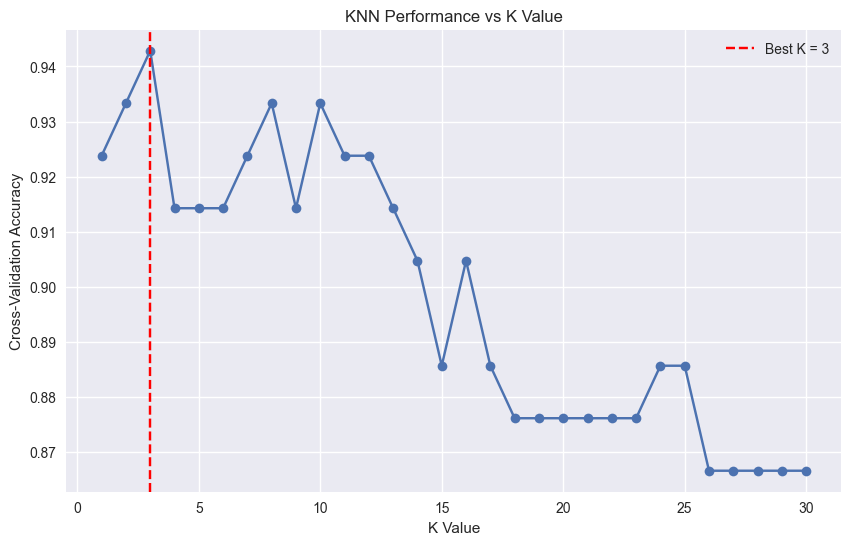

Best K value: 3
Best CV accuracy: 0.943


In [14]:
# Test different K values
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Performance vs K Value')
plt.grid(True)

# Find and mark the best K
best_k = k_range[np.argmax(cv_scores)]
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.show()

print(f"Best K value: {best_k}")
print(f"Best CV accuracy: {max(cv_scores):.3f}")

## 6. Evaluating the Final Model

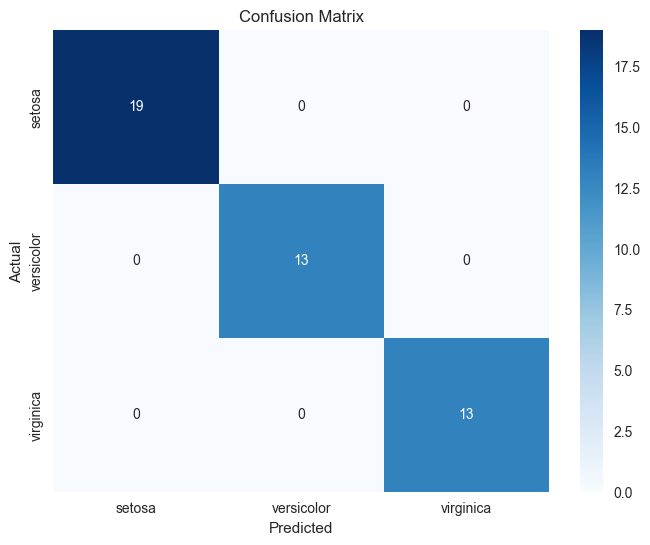


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
# Train final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=target_names))

## 7. KNN for Regression

KNN can also be used for regression tasks. Let's see an example.

In [ ]:
# Generate regression data
X_reg = np.sort(5 * np.random.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

# Test different K values for regression
k_values = [1, 3, 5, 10, 20]
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    plt.subplot(2, 3, i + 1)
    
    # Fit KNN regressor
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_reg, y_reg)
    
    # Predict on dense grid
    X_test_reg = np.linspace(0, 5, 500)[:, np.newaxis]
    y_pred_reg = knn_reg.predict(X_test_reg)
    
    # Plot
    plt.scatter(X_reg, y_reg, color='blue', label='Data', alpha=0.5)
    plt.plot(X_test_reg, y_pred_reg, color='red', label=f'KNN (K={k})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'KNN Regression with K={k}')
    plt.legend()

plt.tight_layout()
plt.show()

## 8. Different Distance Metrics

KNN can use different distance metrics. Let's explore how they affect the results.

In [ ]:
# Compare different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
results = {}

for metric in metrics:
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=3)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    results[metric] = scores.mean()

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Distance Metric')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Performance with Different Distance Metrics')
plt.ylim(0.9, 1.0)
for i, (metric, score) in enumerate(results.items()):
    plt.text(i, score + 0.002, f'{score:.3f}', ha='center')
plt.show()

## 9. Weighted KNN

In weighted KNN, closer neighbors have more influence on the prediction.

In [ ]:
# Compare uniform vs distance weighting
weights = ['uniform', 'distance']
k_range = range(1, 21)

plt.figure(figsize=(10, 6))

for weight in weights:
    cv_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
        cv_scores.append(scores.mean())
    
    plt.plot(k_range, cv_scores, marker='o', label=f'Weights: {weight}')

plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Uniform vs Distance Weighted KNN')
plt.legend()
plt.grid(True)
plt.show()

## 10. Practical Tips and Best Practices

### When to use KNN:
- Small to medium-sized datasets
- Non-linear decision boundaries
- Local patterns are important
- As a baseline model

### Advantages:
- Simple and intuitive
- No training phase (lazy learning)
- Can capture complex patterns
- Works for both classification and regression

### Disadvantages:
- Computationally expensive for large datasets
- Sensitive to feature scaling
- Curse of dimensionality
- Requires good choice of K

### Best Practices:
1. **Always scale your features**
2. **Use cross-validation to find optimal K**
3. **Consider using odd K for binary classification**
4. **Try different distance metrics**
5. **Consider weighted voting for imbalanced datasets**

## Exercise: Build Your Own KNN Classifier

Try implementing a simple KNN classifier from scratch to understand the algorithm better!

In [ ]:
class SimpleKNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        predictions = []
        
        for x in X:
            # Calculate distances to all training points
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            
            # Get indices of k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            
            # Get labels of k nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            
            # Return most common label
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(most_common)
            
        return np.array(predictions)

# Test our implementation
simple_knn = SimpleKNN(k=5)
simple_knn.fit(X_train_scaled, y_train)
y_pred_simple = simple_knn.predict(X_test_scaled)

print(f"Our KNN accuracy: {accuracy_score(y_test, y_pred_simple):.3f}")
print(f"Sklearn KNN accuracy: {accuracy_score(y_test, y_pred_scaled):.3f}")

## Next Steps

Now that you understand KNN, try:

1. **Apply KNN to your own dataset**
2. **Experiment with feature engineering**
3. **Try KNN with different preprocessing techniques**
4. **Compare KNN with other algorithms**
5. **Implement advanced KNN variants (e.g., Radius Neighbors)**

Happy learning!

In [16]:
# Let's create a practical example with detailed metric explanation
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

# Load and prepare data
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_pred)
print(f"Actual vs Predicted:")
print(f"Classes: {target_names}")
print(cm)
print()

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, 
                     index=[f"Actual {name}" for name in target_names],
                     columns=[f"Pred {name}" for name in target_names])
print("Confusion Matrix (prettier format):")
print(cm_df)
print("\n" + "="*50)

print("=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))


=== CONFUSION MATRIX ===
Actual vs Predicted:
Classes: ['setosa' 'versicolor' 'virginica']
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]

Confusion Matrix (prettier format):
                   Pred setosa  Pred versicolor  Pred virginica
Actual setosa               23                0               0
Actual versicolor            0               19               0
Actual virginica             0                1              17

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        23
  versicolor      0.950     1.000     0.974        19
   virginica      1.000     0.944     0.971        18

    accuracy                          0.983        60
   macro avg      0.983     0.981     0.982        60
weighted avg      0.984     0.983     0.983        60



In [17]:
# Let's manually calculate each metric to understand what they mean
print("=== MANUAL CALCULATION FOR EACH CLASS ===\n")

for i, class_name in enumerate(target_names):
    print(f"📊 CLASS: {class_name.upper()}")
    print("-" * 40)
    
    # Extract values from confusion matrix for this class
    # For class i: TP is cm[i,i], FP is sum of column i except cm[i,i], 
    # FN is sum of row i except cm[i,i], TN is everything else
    
    tp = cm[i, i]  # True Positives
    fp = cm[:, i].sum() - tp  # False Positives (predicted as this class but actually other classes)
    fn = cm[i, :].sum() - tp  # False Negatives (actually this class but predicted as others)
    tn = cm.sum() - tp - fp - fn  # True Negatives
    
    print(f"True Positives (TP):  {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Negatives (TN):  {tn}")
    print()
    
    # Calculate metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"🎯 Precision = TP/(TP+FP) = {tp}/({tp}+{fp}) = {precision:.3f}")
    print(f"   → \"Of all my {class_name} predictions, {precision:.1%} were correct\"")
    print()
    
    print(f"🔍 Recall = TP/(TP+FN) = {tp}/({tp}+{fn}) = {recall:.3f}")
    print(f"   → \"I found {recall:.1%} of all actual {class_name} flowers\"")
    print()
    
    print(f"⚖️  F1-Score = 2×(P×R)/(P+R) = 2×({precision:.3f}×{recall:.3f})/({precision:.3f}+{recall:.3f}) = {f1:.3f}")
    print(f"   → \"Balanced score considering both precision and recall\"")
    print()
    
    # Verify with sklearn
    sklearn_precision = precision_score(y_test, y_pred, labels=[i], average=None)[0]
    sklearn_recall = recall_score(y_test, y_pred, labels=[i], average=None)[0]
    sklearn_f1 = f1_score(y_test, y_pred, labels=[i], average=None)[0]
    
    print(f"✅ Sklearn verification: P={sklearn_precision:.3f}, R={sklearn_recall:.3f}, F1={sklearn_f1:.3f}")
    print("=" * 50)
    print()


=== MANUAL CALCULATION FOR EACH CLASS ===

📊 CLASS: SETOSA
----------------------------------------
True Positives (TP):  23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN):  37

🎯 Precision = TP/(TP+FP) = 23/(23+0) = 1.000
   → "Of all my setosa predictions, 100.0% were correct"

🔍 Recall = TP/(TP+FN) = 23/(23+0) = 1.000
   → "I found 100.0% of all actual setosa flowers"

⚖️  F1-Score = 2×(P×R)/(P+R) = 2×(1.000×1.000)/(1.000+1.000) = 1.000
   → "Balanced score considering both precision and recall"

✅ Sklearn verification: P=1.000, R=1.000, F1=1.000

📊 CLASS: VERSICOLOR
----------------------------------------
True Positives (TP):  19
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN):  40

🎯 Precision = TP/(TP+FP) = 19/(19+1) = 0.950
   → "Of all my versicolor predictions, 95.0% were correct"

🔍 Recall = TP/(TP+FN) = 19/(19+0) = 1.000
   → "I found 100.0% of all actual versicolor flowers"

⚖️  F1-Score = 2×(P×R)/(P+R) = 2×(0.950×1.000)/(0.950+1.00

In [ ]:
# Let's demonstrate different averaging methods
print("=== DIFFERENT AVERAGING METHODS ===\n")

# Calculate averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print(f"🔢 MACRO Average (treats all classes equally):")
print(f"   Precision: {macro_precision:.3f}")
print(f"   Recall:    {macro_recall:.3f}")
print(f"   F1-Score:  {macro_f1:.3f}")
print()

print(f"⚖️  WEIGHTED Average (weighted by class frequency):")
print(f"   Precision: {weighted_precision:.3f}")
print(f"   Recall:    {weighted_recall:.3f}")
print(f"   F1-Score:  {weighted_f1:.3f}")
print()

print(f"🌐 MICRO Average (global calculation):")
print(f"   Precision: {micro_precision:.3f}")
print(f"   Recall:    {micro_recall:.3f}")
print(f"   F1-Score:  {micro_f1:.3f}")
print()

# Show class distribution
print("📊 Class distribution in test set:")
unique, counts = np.unique(y_test, return_counts=True)
for class_idx, count in zip(unique, counts):
    print(f"   {target_names[class_idx]}: {count} samples ({count/len(y_test):.1%})")
print()

print("💡 Key Takeaways:")
print("• Macro average: Good when all classes are equally important")
print("• Weighted average: Good when you want to account for class imbalance") 
print("• Micro average: Good for overall system performance")
print("• For balanced datasets (like Iris), all averages are similar")
print("• For imbalanced datasets, these can differ significantly!")


In [ ]:
# Let's create a simple example to understand True Negatives
import numpy as np
import pandas as pd

# Create a simple example confusion matrix
print("=== UNDERSTANDING TRUE NEGATIVES ===\n")

# Example confusion matrix for 3 classes (like Iris)
example_cm = np.array([
    [15,  0,  0],  # Actual Setosa
    [ 0, 13,  2],  # Actual Versicolor  
    [ 0,  1, 14]   # Actual Virginica
])

classes = ['Setosa', 'Versicolor', 'Virginica']
print("Example Confusion Matrix:")
print("                Predicted")
print("              Set  Ver  Vir")
for i, class_name in enumerate(classes):
    print(f"Actual {class_name[:3]}   {example_cm[i]}")
print()

# For each class, calculate all four metrics
for i, class_name in enumerate(classes):
    print(f"🌸 FOR {class_name.upper()} CLASS (one-vs-rest approach):")
    print("-" * 50)
    
    # Calculate TP, FP, FN, TN for this class
    tp = example_cm[i, i]  # Diagonal element
    fp = example_cm[:, i].sum() - tp  # Column sum minus TP
    fn = example_cm[i, :].sum() - tp  # Row sum minus TP
    tn = example_cm.sum() - tp - fp - fn  # Everything else
    
    print(f"True Positives (TP):  {tp}")
    print(f"  → Correctly predicted as {class_name}: {tp} samples")
    print()
    
    print(f"False Positives (FP): {fp}")
    print(f"  → Incorrectly predicted as {class_name}: {fp} samples")
    print(f"  → (Other flowers mistakenly called {class_name})")
    print()
    
    print(f"False Negatives (FN): {fn}")
    print(f"  → Missed {class_name} flowers: {fn} samples")
    print(f"  → (Actual {class_name} flowers called something else)")
    print()
    
    print(f"True Negatives (TN):  {tn}")
    print(f"  → Correctly predicted as NOT {class_name}: {tn} samples")
    print(f"  → (Non-{class_name} flowers correctly identified as non-{class_name})")
    print()
    
    # Show which specific samples contribute to TN
    print(f"📊 True Negatives breakdown for {class_name}:")
    tn_breakdown = []
    for j in range(len(classes)):
        for k in range(len(classes)):
            if j != i and k != i:  # Neither actual nor predicted is this class
                count = example_cm[j, k]
                if count > 0:
                    tn_breakdown.append(f"   • {count} actual {classes[j]} correctly predicted as {classes[k]}")
    
    for breakdown in tn_breakdown:
        print(breakdown)
    
    total_samples = example_cm.sum()
    print(f"\n✅ Verification: TP + FP + FN + TN = {tp} + {fp} + {fn} + {tn} = {tp+fp+fn+tn}")
    print(f"   Total samples in dataset: {total_samples}")
    print("=" * 70)
    print()
